## 🌟 Predizendo o Câncer de Mama com Machine Learning 🌟

O câncer de mama é uma das doenças mais preocupantes da atualidade, mas a tecnologia está revolucionando a forma como podemos detectá-lo precocemente. Este código traz uma abordagem poderosa para analisar dados de tumores e construir modelos preditivos utilizando Machine Learning.

## ✨ Índice
1. [Carregamento dos Dados](#carregamento-dos-dados)
2. [Análise Exploratória](#análise-exploratória)
3. [Preparação dos Dados](#preparação-dos-dados)
4. [Treinamento do Modelo](#treinamento-do-modelo)
5. [Avaliação do Modelo](#avaliação-do-modelo)

### 🔍 Carregamento dos Dados
- Carrega o famoso conjunto de dados `breast_cancer` do Scikit-Learn, que contém informações detalhadas sobre células cancerosas.

### 🔍 Análise Exploratória
- Realiza uma análise exploratória visual e estatística para entender os padrões presentes nos dados.

### 🔍 Preparação dos Dados
- Lida com valores ausentes e separa os dados em conjuntos de treino e teste.

### 🔍 Treinamento do Modelo
- Aplica técnicas de Machine Learning para classificação dos dados.

### 🔍 Avaliação do Modelo
- Avalia o desempenho do modelo treinado utilizando métricas adequadas.

### 🌐 Por que isso importa?
A inteligência artificial tem um papel fundamental na detecção precoce do câncer. Com modelos precisos e bem treinados, podemos ajudar médicos a tomarem decisões mais assertivas, salvando vidas e otimizando diagnósticos.

Pronto para explorar esse código e entender como a ciência de dados pode transformar a saúde? Vamos nessa! 🚀

# 1- BIBLIOTECAS UTILIZADAS:

In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn as skl # importa o sckit-learn
from sklearn import metrics 
import numpy as np


# 2 - CARREGAR OS DADOS:

In [5]:

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### comentários:
    - df é um DataFrame que contém os dados do dataset de câncer de mama.
    - Cada coluna representa um atributo do câncer, e cada linha representa um paciente.
    - A coluna 'target' contém as classes dos pacientes (0 = benigno, 1 = maligno).
    - As outras colunas contêm medidas estatísticas do paciente, como o raio, textura, perímetro, área, etc.
    - O dataset possui 569 exemplos e 31 colunas.

## VERIFICAÇÃO DE DADOS NULOS:

In [8]:
contatem_total = df.isnull().count()
valores_ausentes = df.isnull().sum() 
porcentagem = round(valores_ausentes / contatem_total * 100, 2)
df_ausentes = pd.DataFrame({'Total de Valores Ausentes': valores_ausentes, 'Porcentagem': porcentagem})
df_ausentes


,Total de Valores Ausentes,Porcentagem
mean radius,0,0.0
mean texture,0,0.0
mean perimeter,0,0.0
mean area,0,0.0
mean smoothness,0,0.0
mean compactness,0,0.0
mean concavity,0,0.0
mean concave points,0,0.0
mean symmetry,0,0.0
mean fractal dimension,0,0.0


# ANÁLISE EXPLORATÓRIA DOS DADOS:

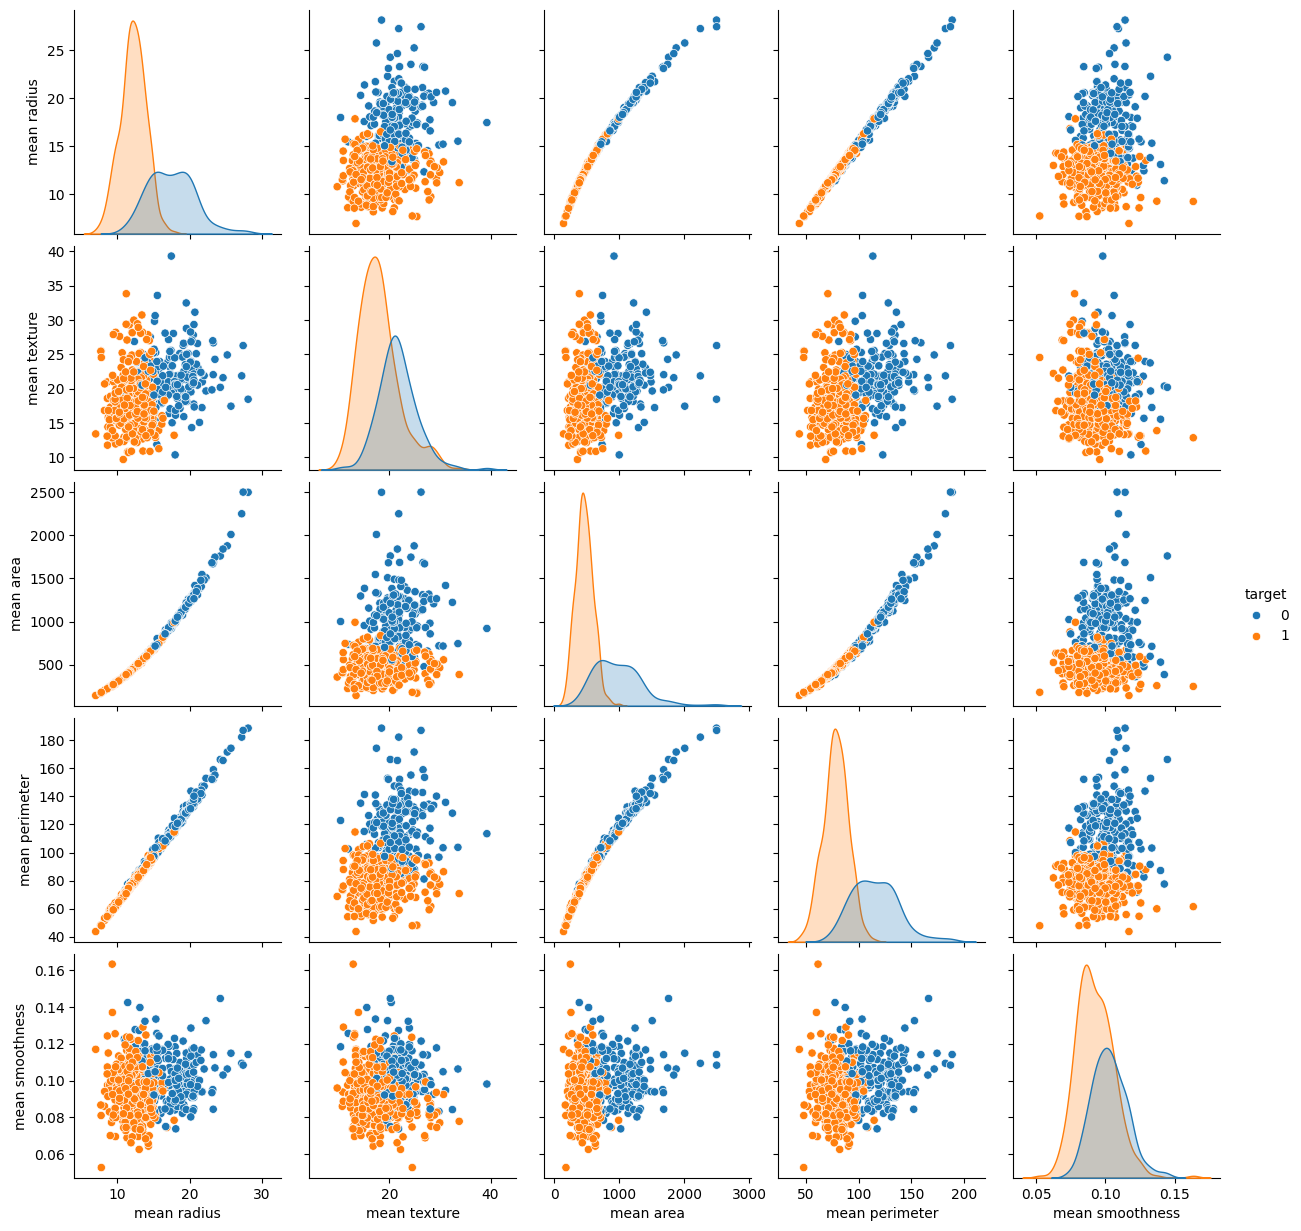

In [35]:
sns.pairplot(df,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

**Comentário**:

O gráfico de dispersão (pairplot) permite visualizar a relação entre essas características e verificar se há uma separação clara entre os dois tipos de tumores, auxiliando na identificação de padrões que podem ser úteis para modelos de classificação. 


<Axes: >

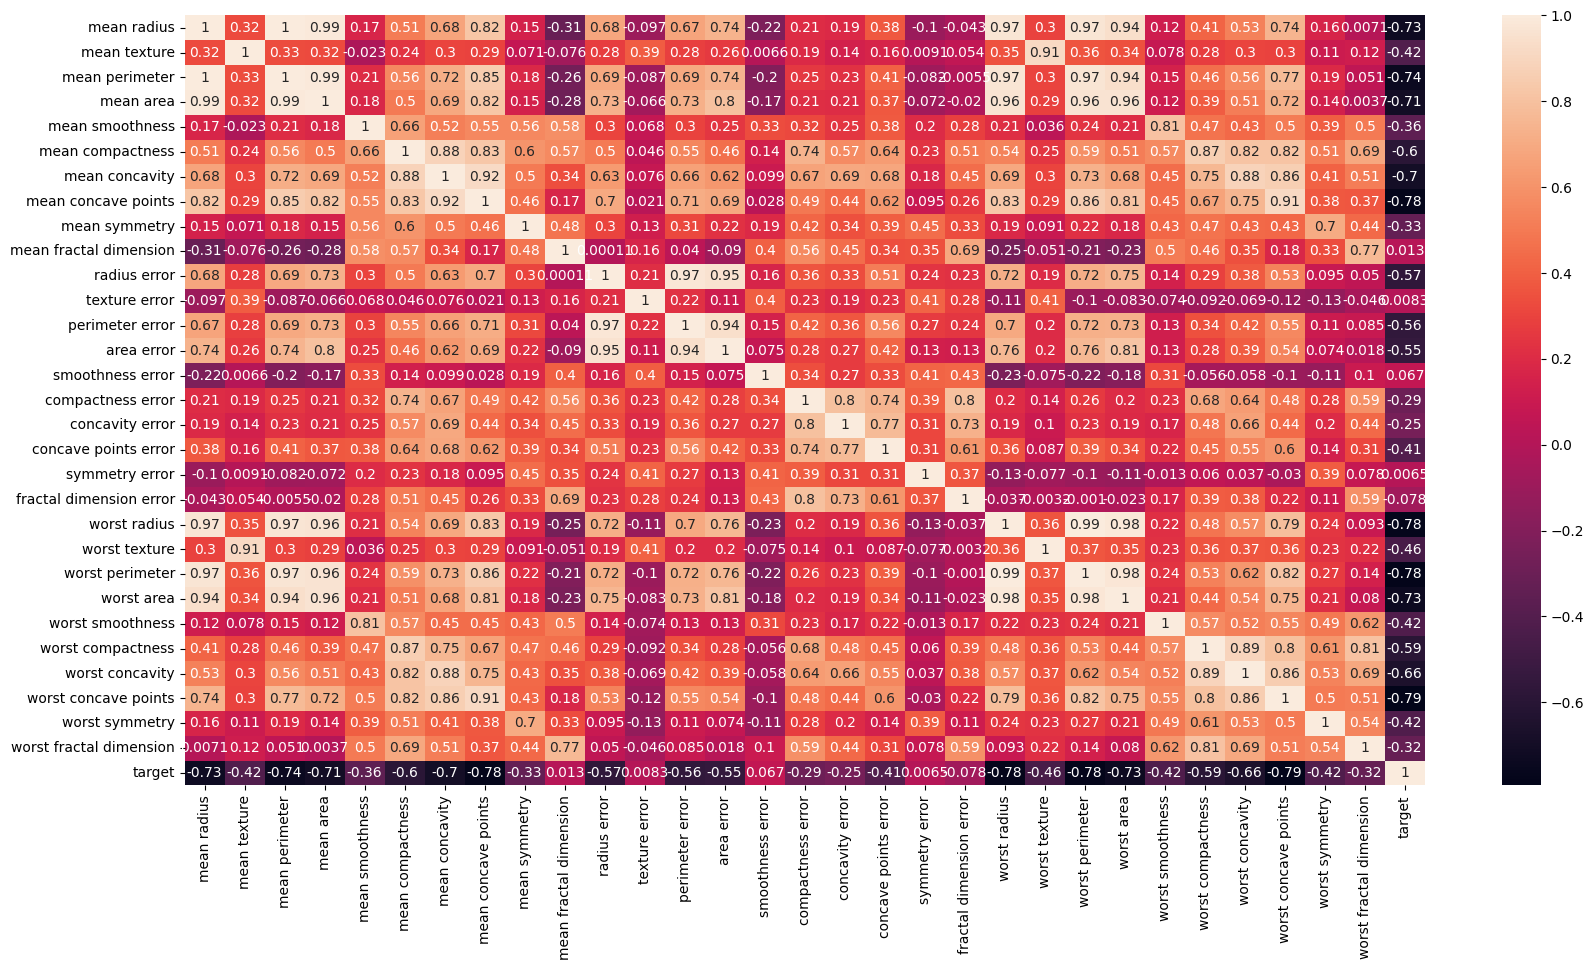

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

##### **Comentário:**

O mapa de calor (heatmap) mostra a correlação entre as características do dataset. As cores mais escuras indicam uma forte correlação positiva, enquanto as cores mais claras indicam uma forte correlação negativa. As cores brancas indicam uma correlação muito baixa ou não linear.

# TREINAMENTO DO MODELO:


In [23]:
# separa os dados em treino e teste
X = df.drop(['target'],axis=1)
y = df.target

## DIVISÂO DOS DADOS:

Foi escolhido para os dados de teste correspondendo a 20% e 80% para o treinamento do modelo.

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state= 5)

### Normalização dos dados:
A normalização dos dados é importante porque melhora a qualidade da análise e do desempenho dos modelos de machine learning. 


In [12]:
# normaliza os valores dos atributos para que fiquem com media igual a zero e desvio padrao igual a um
scaler = skl.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## BUSCA EM GRADE PARA O KNN:

A busca em grade (ou Grid Search) é um método para encontrar os melhores hiperparâmetros para um modelo de aprendizado de máquina.
No caso do k-NN (k-Nearest Neighbors), os hiperparâmetros mais comuns para otimizar são:

1 - Número de vizinhos (k): Controla quantos vizinhos serão considerados para classificar um novo ponto.

2 - Métrica de distância: Pode ser a distância euclidiana, manhattan, minkowski, etc.

3 - Peso das amostras: Pode ser uniform (todos os vizinhos têm o mesmo peso) ou distance (os vizinhos mais próximos têm mais influência).


In [30]:
KNNClassifier = skl.neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,16,2)} 


cvGrid = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2020)

# inicia a busca em grade
classifier = skl.model_selection.GridSearchCV(KNNClassifier, cv=cvGrid, param_grid=param_grid, scoring = 'f1_macro')

print('Classificador inicializado com sucesso')

Classificador inicializado com sucesso


In [42]:

classifier.fit(X_train, Y_train) 
classifier_best = classifier.best_estimator_
 
print('\nQtd. de vizinhos escolhida na busca em grade')
print('Parâmetro: ', classifier.best_params_['n_neighbors'], '-- Score: ', "{0:.3f}".format(classifier.best_score_))

print("\nMacro F-medida obtida para cada parametro testado na busca em grade:")
print()
means = classifier.cv_results_['mean_test_score']
for mean, params in zip(means, classifier.cv_results_['params']):
    print("n_neighbors = %d -- Macro F-medida = %0.3f" % (params['n_neighbors'],mean))


Qtd. de vizinhos escolhida na busca em grade
Parâmetro:  11 -- Score:  0.903

Macro F-medida obtida para cada parametro testado na busca em grade:

n_neighbors = 1 -- Macro F-medida = 0.887
n_neighbors = 3 -- Macro F-medida = 0.887
n_neighbors = 5 -- Macro F-medida = 0.896
n_neighbors = 7 -- Macro F-medida = 0.896
n_neighbors = 9 -- Macro F-medida = 0.895
n_neighbors = 11 -- Macro F-medida = 0.903
n_neighbors = 13 -- Macro F-medida = 0.894
n_neighbors = 15 -- Macro F-medida = 0.903


**Comentário**:

O modelo escolheu 11 vizinhos como o melhor número de vizinhos para classificação. As métricas de avaliação do modelo foram calculadas usando a média macro F-medida, que considera a média ponderada das métricas de cada classe.

## TREINAMENTO DO MODELO KNN COM *n_neighbors* IGUAL A 11:

In [ ]:

classifier = skl.neighbors.KNeighborsClassifier(n_neighbors=11) 
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test) 
        
print('\nPredição obtida para as 30 amostras de teste:\n', Y_pred[0:30])


Predição obtida para as 30 amostras de teste:
 [0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]


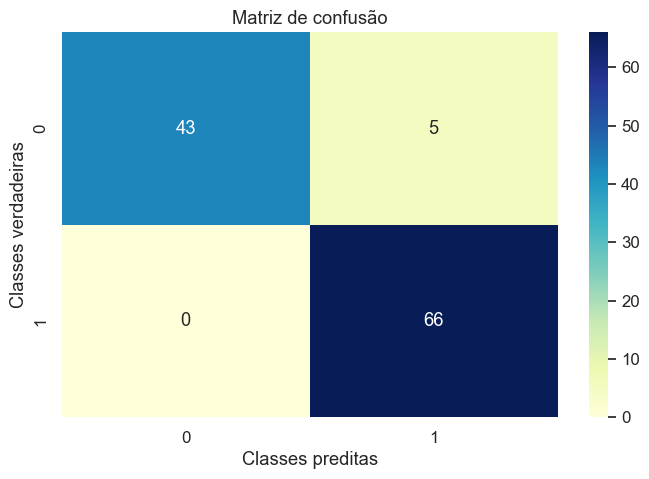

In [ ]:


import numpy as np
classesDataset = np.unique(Y_train)

cm = skl.metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, xticklabels=classesDataset, yticklabels=classesDataset, cmap="YlGnBu", annot=True)
sns.set(font_scale=1.1) 
        
plt.xlabel('Classes preditas')
plt.ylabel('Classes verdadeiras')
plt.title('Matriz de confusão')
plt.show()

*Comentário:*

O modelo classificou corretamente 43 exemplos da classe 0, mas errou 5, atribuindo-os erroneamente à classe 1.
Para a classe 1, todas as 66 amostras foram classificadas corretamente, sem falsos negativos

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test, Y_pred))

Confusion Matrix: 
 [[43  5]
 [ 0 66]]


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.93      1.00      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# COMENTÁRIO FINAL:

- A avaliação do modelo de classificação apresentou resultados bastante satisfatórios, com uma acurácia de 96% em um conjunto de 114 amostras.

**Analisando as métricas por classe, observa-se que:**

- Para a classe 0, o modelo obteve uma precisão de 1.00, um recall de 0.90 e um F1-score de 0.95, indicando que todas as previsões dessa classe foram corretas, mas alguns exemplos reais da classe 0 foram classificados incorretamente.
- Para a classe 1, os valores foram 0.93 de precisão, 1.00 de recall e 0.96 de F1-score, sugerindo que o modelo foi muito eficaz em identificar corretamente todos os exemplos dessa classe, com algumas previsões erradas.


**Os valores médios das métricas confirmam a consistência do modelo:**

- Média macro (média simples entre as classes): 0.96 de precisão, 0.95 de recall e 0.95 de F1-score.
Média ponderada (considerando o número de exemplos por classe): 0.96 para todas as métricas, reforçando o bom desempenho global do modelo.

**Considerações adicionais:**
Esses resultados indicam que o modelo está bem ajustado, com um ótimo equilíbrio entre precisão e recall, sendo eficaz na classificação dos dados. 🚀